In [153]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
plt.style.use("fivethirtyeight")
import warnings
warnings.filterwarnings('ignore')

In [71]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [73]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [74]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [75]:
df.duplicated().sum()

0

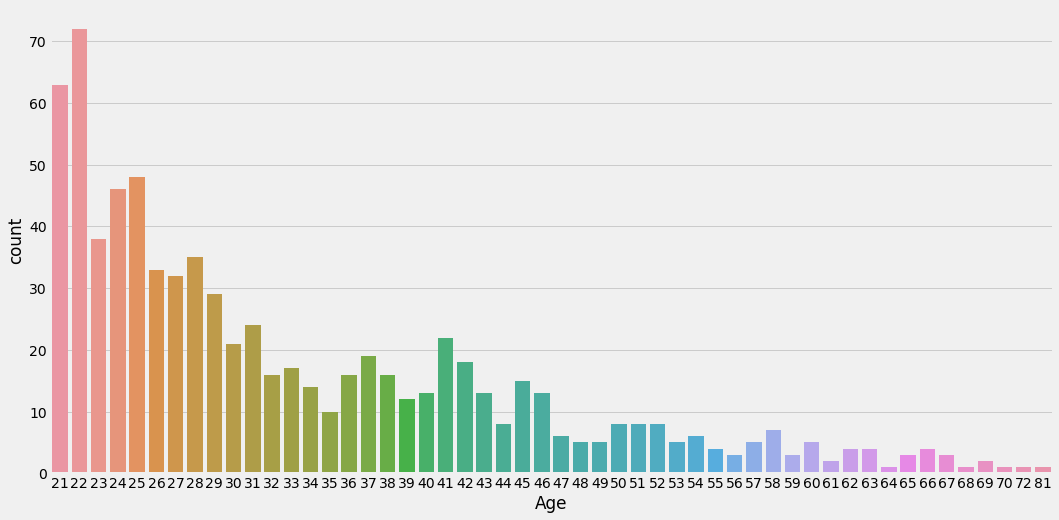

In [76]:
plt.figure(figsize=[16,8])

sns.countplot(x=df.Age,data= df)
plt.show()

In [77]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

<AxesSubplot:xlabel='Age', ylabel='Density'>

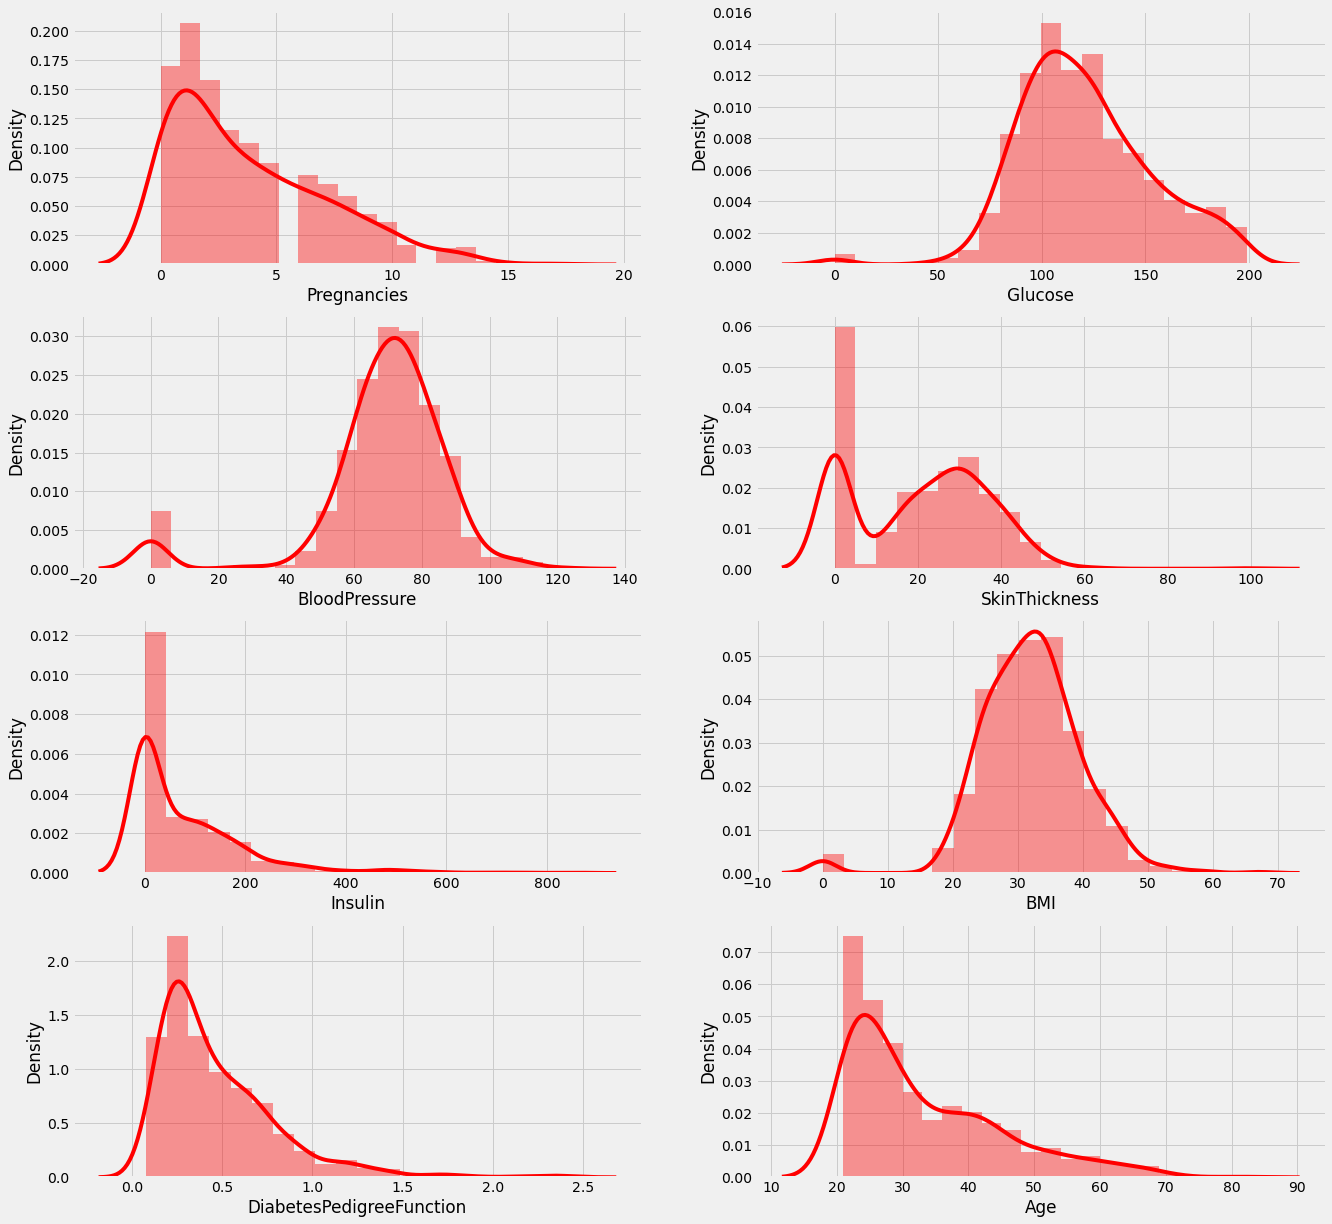

In [78]:
fig,ax = plt.subplots(4,2, figsize=(20,20))
sns.distplot(df.Pregnancies, bins=20, ax=ax[0,0], color="red")
sns.distplot(df.Glucose, bins=20, ax=ax[0,1], color="red")
sns.distplot(df.BloodPressure, bins=20, ax=ax[1,0], color="red")
sns.distplot(df.SkinThickness, bins=20, ax=ax[1,1], color="red")
sns.distplot(df.Insulin, bins=20, ax=ax[2,0], color="red")
sns.distplot(df.BMI, bins=20, ax=ax[2,1], color="red")
sns.distplot(df.DiabetesPedigreeFunction, bins=20, ax=ax[3,0], color="red")
sns.distplot(df.Age, bins=20, ax=ax[3,1], color="red")

In [79]:
df.groupby("Outcome").agg({'Pregnancies':'mean'})


,Pregnancies
Outcome,
0,3.298000
1,4.865672


In [80]:
df.groupby("Outcome").agg({'Pregnancies':'max'})


,Pregnancies
Outcome,
0,13
1,17


In [81]:
df.groupby("Outcome").agg({'Glucose':'mean'})


,Glucose
Outcome,
0,109.980000
1,141.257463


In [82]:
df.groupby("Outcome").agg({'Glucose':'max'})


,Glucose
Outcome,
0,197
1,199


In [83]:
df.groupby("Outcome").agg({'BloodPressure':'max'})


,BloodPressure
Outcome,
0,122
1,114


In [84]:
df.groupby("Outcome").agg({'BloodPressure':'mean'})


,BloodPressure
Outcome,
0,68.184000
1,70.824627


In [85]:
df.groupby("Outcome").agg({'DiabetesPedigreeFunction':'mean'})



,DiabetesPedigreeFunction
Outcome,
0,0.429734
1,0.550500


In [86]:
df.groupby("Outcome").agg({'DiabetesPedigreeFunction':'max'})


,DiabetesPedigreeFunction
Outcome,
0,2.329
1,2.420


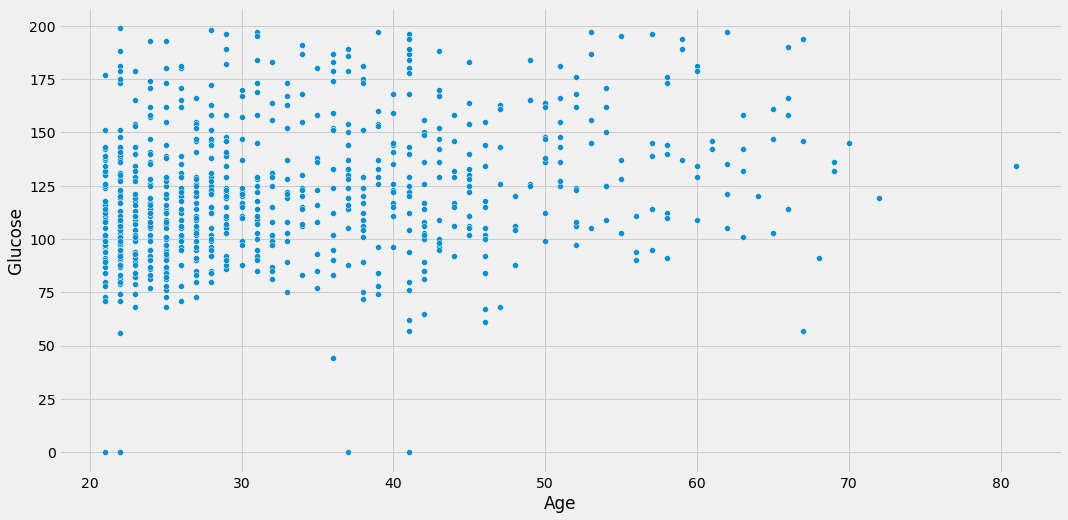

In [87]:
plt.figure(figsize=[16,8])
sns.scatterplot(x=df.Age , y = df.Glucose , data=df)
plt.show()

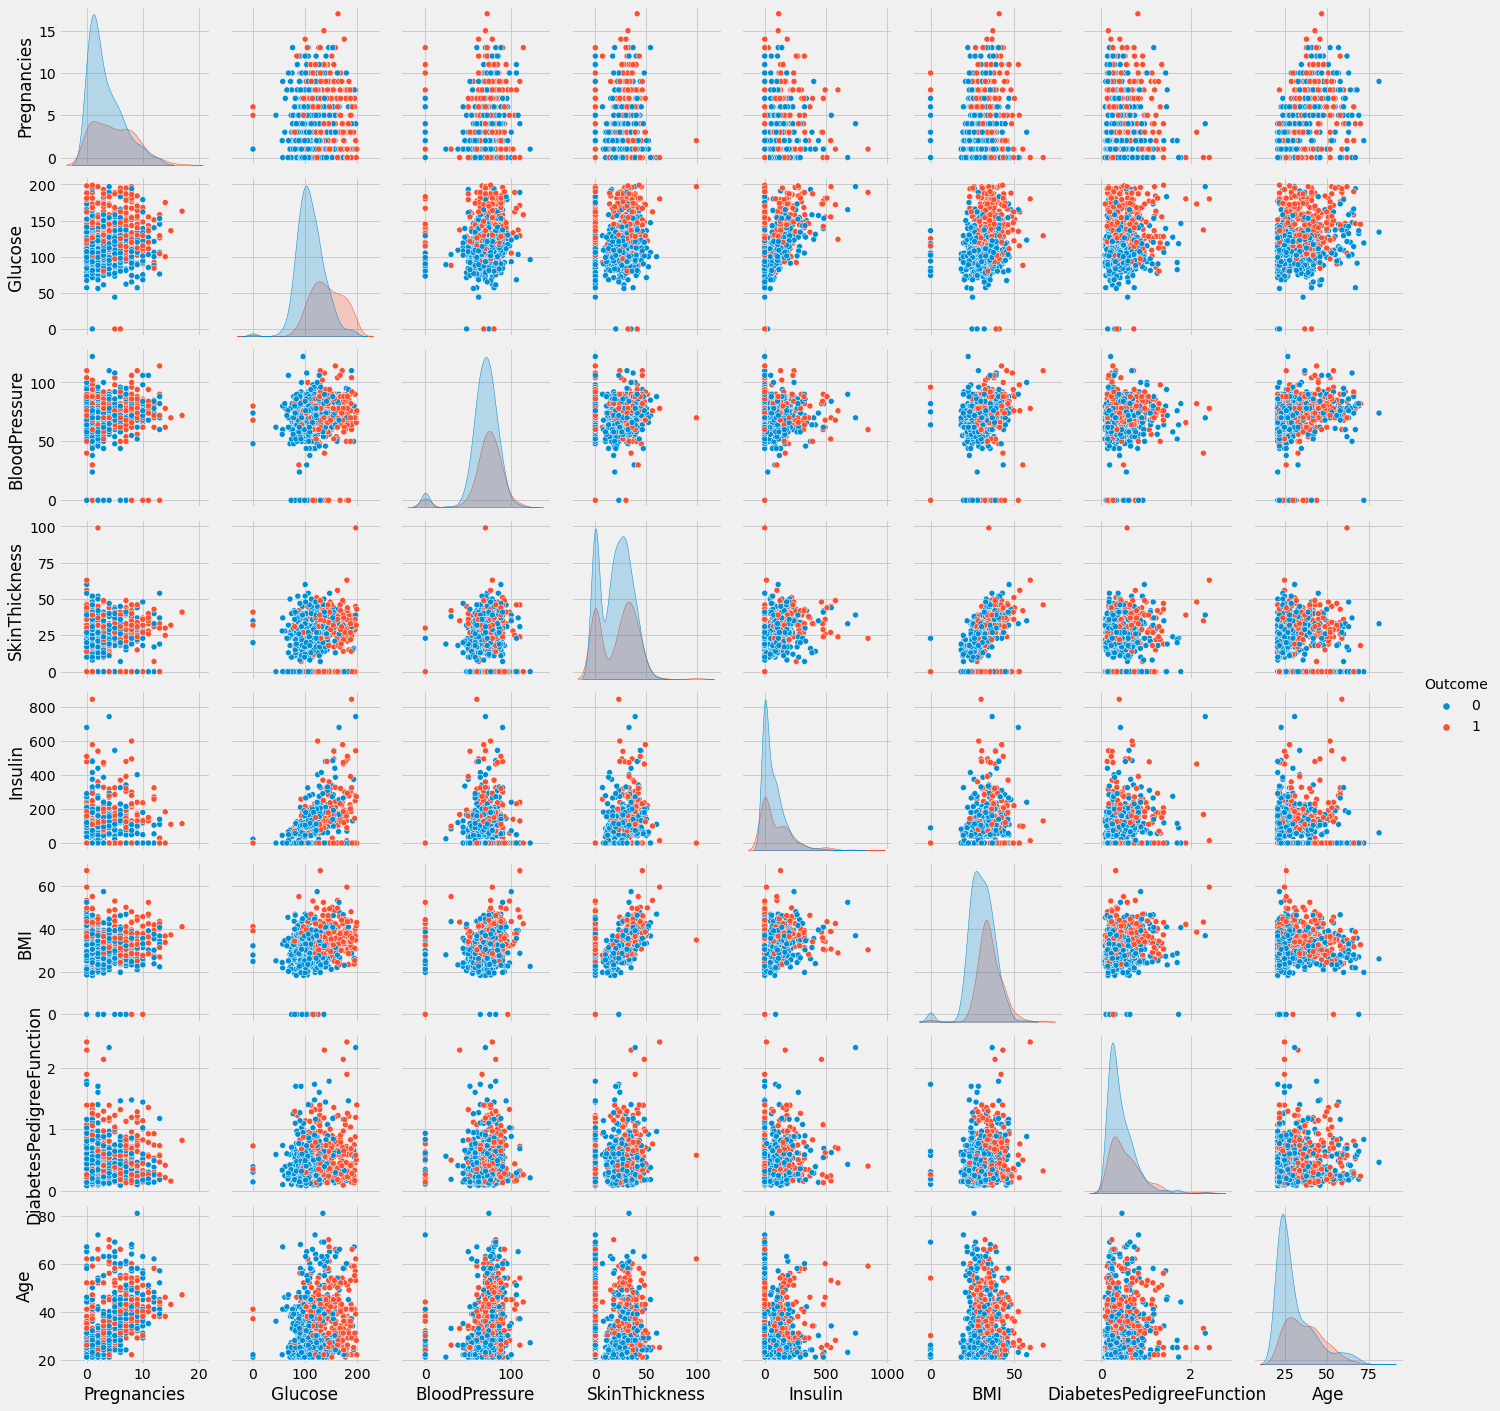

In [88]:
sns.pairplot(df,hue='Outcome')

<AxesSubplot:>

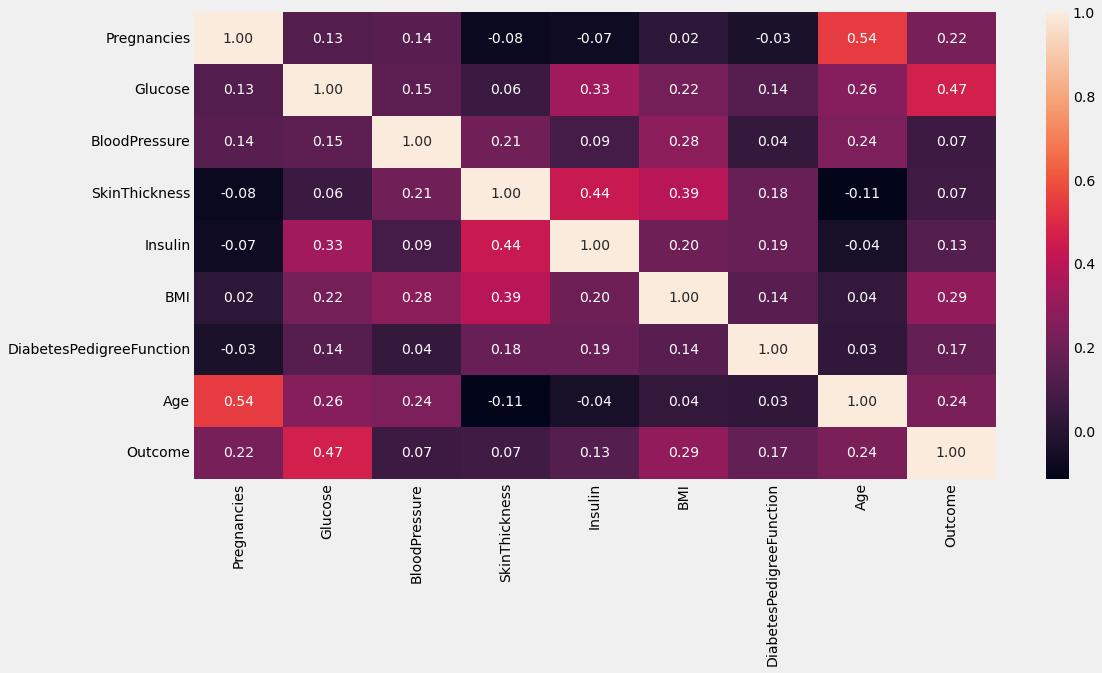

In [89]:
plt.figure(figsize=[16,8])

sns.heatmap(df.corr(),annot=True,fmt = '.2f')

In [91]:
df[[ 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']] = df[[ 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']].replace(0, np.NaN)

In [92]:
df.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [96]:
def median_target(var):   
    temp = df[df[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

In [97]:
columns = df.columns
columns = columns.drop("Outcome")
for i in columns:
    median_target(i)
    df.loc[(df['Outcome'] == 0 ) & (df[i].isnull()), i] = median_target(i)[i][0]
    df.loc[(df['Outcome'] == 1 ) & (df[i].isnull()), i] = median_target(i)[i][1]

In [98]:
df.isnull().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<AxesSubplot:ylabel='Insulin'>

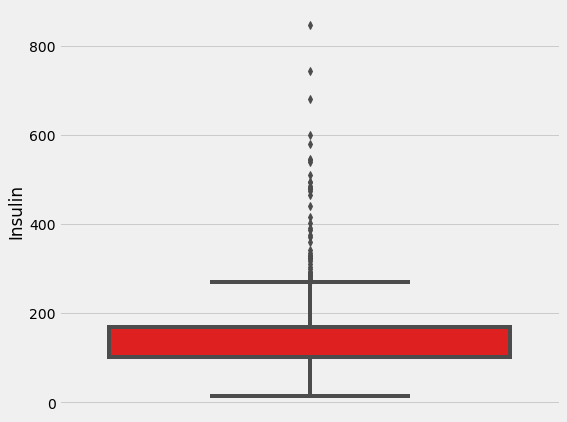

In [108]:
plt.figure(figsize=(8,7))
sns.boxplot(y= df["Insulin"], color="red")
 


In [110]:
Q1 = df.Insulin.quantile(0.25)
Q3 = df.Insulin.quantile(0.75)
IQR = Q3-Q1
lower = Q1-1.5*IQR
upper = Q3+1.5*IQR
df.loc[df['Insulin']>upper, "Insulin"] = upper

<AxesSubplot:ylabel='Insulin'>

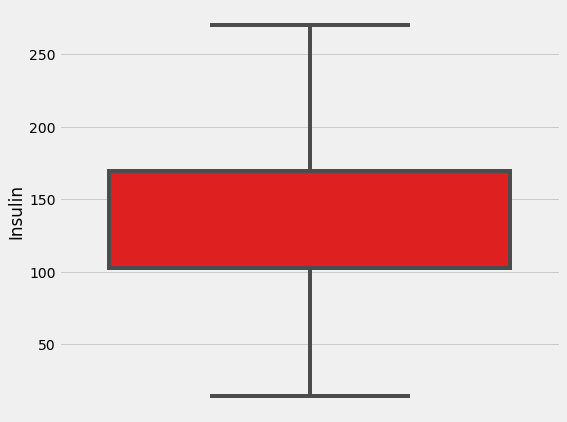

In [111]:
plt.figure(figsize=(8,7))
sns.boxplot(y= df["Insulin"], color="red")
 

<AxesSubplot:ylabel='Pregnancies'>

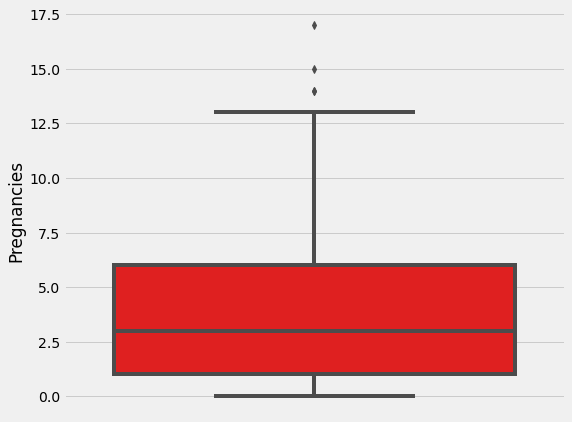

In [116]:
plt.figure(figsize=(8,7))
sns.boxplot(y= df["Pregnancies"], color="red")

In [124]:
Q1 = df.Pregnancies.quantile(0.25)
Q3 = df.Pregnancies.quantile(0.75)
IQR = Q3-Q1
lower = Q1-1.5*IQR
upper = Q3+1.5*IQR
df.loc[df['Pregnancies']>upper, "Pregnancies"] = upper

<AxesSubplot:ylabel='Pregnancies'>

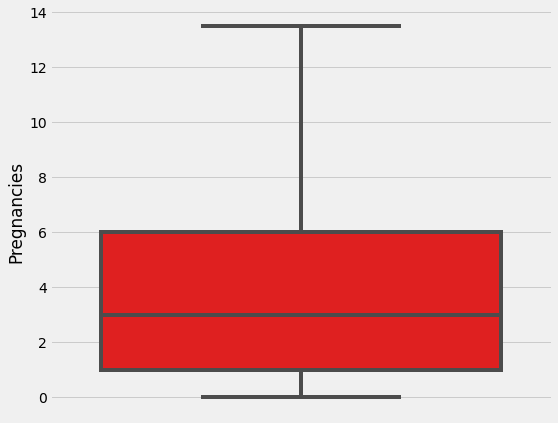

In [125]:
plt.figure(figsize=(8,7))
sns.boxplot(y= df["Pregnancies"], color="red")

<AxesSubplot:ylabel='Glucose'>

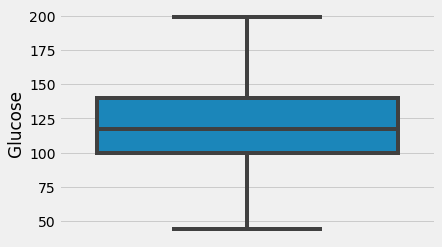

In [127]:
sns.boxplot(y=df.Glucose)

<AxesSubplot:ylabel='DiabetesPedigreeFunction'>

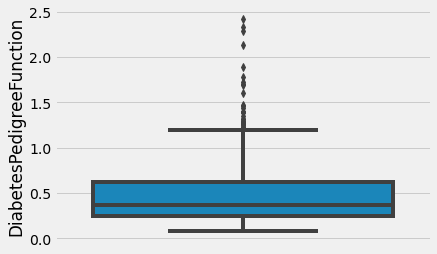

In [138]:
sns.boxplot(y=df.DiabetesPedigreeFunction)


In [139]:
Q1 = df.DiabetesPedigreeFunction.quantile(0.25)
Q3 = df.DiabetesPedigreeFunction.quantile(0.75)
IQR = Q3-Q1
lower = Q1-1.5*IQR
upper = Q3+1.5*IQR
df.loc[df['DiabetesPedigreeFunction']>upper, "DiabetesPedigreeFunction"] = upper

<AxesSubplot:ylabel='DiabetesPedigreeFunction'>

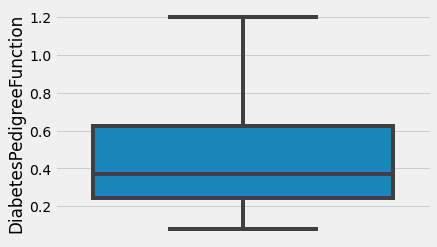

In [140]:
sns.boxplot(y=df.DiabetesPedigreeFunction)

In [142]:
#creat model 
x = df.drop('Outcome',axis=1)
y = df.Outcome

In [146]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)
model1 = LogisticRegression()

LogisticRegression()
accuracy : 0.8181818181818182


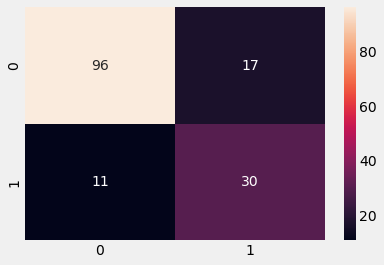

In [147]:
def cal(model):
    model.fit(x_train,y_train)
    prediction = model.predict(x_test)
    sns.heatmap(confusion_matrix(prediction,y_test),annot=True)
    print(model)
    print('accuracy :', model.score(x_test,y_test))
cal(model1)

In [148]:
model2 = SVC()
model3 = RandomForestClassifier()
model4 = GradientBoostingClassifier()

SVC()
accuracy : 0.8896103896103896


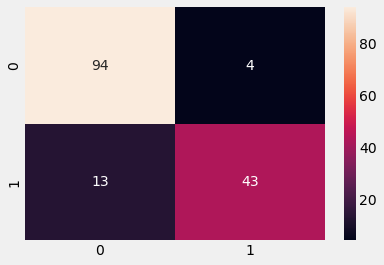

In [149]:
cal(model2)

RandomForestClassifier()
accuracy : 0.8896103896103896


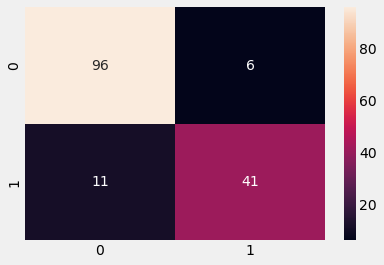

In [150]:
cal(model3)

GradientBoostingClassifier()
accuracy : 0.9025974025974026


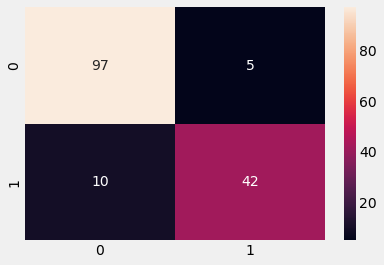

In [151]:
cal(model4)